<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Image augmentation of random rotation between -5 to +5 degrees

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3. StepLR with step size 7 and gamma value 0.1. 

Target: 
======

In this step

1. I reduced the number of parameters further below 6000
2. I am also going to increase the step size to 7 assuming that the first 6 steps may take the loss closure to the minimum 
3. Target is to achieve over 99.4% validation accuracy with less than 6,000 parameters
4. Run it for less than 15 epochs

Result: 
======
1. Observed Train accuracy: 98.91%
2. Validation accuracy:99.38%
3. Number of parameters: 5,854


Analysis: 
========

1. With less parameters the model could not reach the required accuracy 
2. Having said the above and looking at the pattern of increase in validation accuracy from one epoch to another , I think i can try to optimize it further by keeping the parameters same


In [2]:
from model import model9 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
       BatchNorm2d-3           [-1, 10, 28, 28]              20
         Dropout2d-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 10, 28, 28]             900
              ReLU-6           [-1, 10, 28, 28]               0
       BatchNorm2d-7           [-1, 10, 28, 28]              20
         Dropout2d-8           [-1, 10, 28, 28]               0
         MaxPool2d-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 12, 14, 14]           1,080
             ReLU-11           [-1, 12, 14, 14]               0
      BatchNorm2d-12           [-1, 12, 14, 14]              24
        Dropout2d-13           [-1, 12, 14, 14]               0
           Conv2d-14           [-1, 12,

G:\TSAI-ERA\Session 7\model.py:538: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 64
rotation_range = (-5.0, 5.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [11]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.069 ).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.019, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


  0%|                                                                                          | 0/938 [00:00<?, ?it/s]G:\TSAI-ERA\Session 7\model.py:538: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=0.012705390341579914 Batch_id=937 Accuracy=92.97: 100%|█████████████████████████| 938/938 [01:16<00:00, 12.26it/s]



Test set: Average loss: 0.0490, Accuracy: 9839/10000 (98.39%)

Currently Executing Epoch: 2


Loss=0.12872600555419922 Batch_id=937 Accuracy=97.38: 100%|██████████████████████████| 938/938 [01:15<00:00, 12.50it/s]



Test set: Average loss: 0.0326, Accuracy: 9901/10000 (99.01%)

Currently Executing Epoch: 3


Loss=0.008177991025149822 Batch_id=937 Accuracy=97.79: 100%|█████████████████████████| 938/938 [01:15<00:00, 12.48it/s]



Test set: Average loss: 0.0293, Accuracy: 9903/10000 (99.03%)

Currently Executing Epoch: 4


Loss=0.06960078328847885 Batch_id=937 Accuracy=98.14: 100%|██████████████████████████| 938/938 [01:14<00:00, 12.58it/s]



Test set: Average loss: 0.0310, Accuracy: 9893/10000 (98.93%)

Currently Executing Epoch: 5


Loss=0.03240697458386421 Batch_id=937 Accuracy=98.27: 100%|██████████████████████████| 938/938 [01:14<00:00, 12.61it/s]



Test set: Average loss: 0.0251, Accuracy: 9914/10000 (99.14%)

Currently Executing Epoch: 6


Loss=0.0021144053898751736 Batch_id=937 Accuracy=98.33: 100%|████████████████████████| 938/938 [01:14<00:00, 12.61it/s]



Test set: Average loss: 0.0234, Accuracy: 9919/10000 (99.19%)

Currently Executing Epoch: 7


Loss=0.10714032500982285 Batch_id=937 Accuracy=98.46: 100%|██████████████████████████| 938/938 [01:18<00:00, 11.89it/s]



Test set: Average loss: 0.0261, Accuracy: 9922/10000 (99.22%)

Currently Executing Epoch: 8


Loss=0.0025563545059412718 Batch_id=937 Accuracy=98.75: 100%|████████████████████████| 938/938 [01:12<00:00, 12.94it/s]



Test set: Average loss: 0.0215, Accuracy: 9929/10000 (99.29%)

Currently Executing Epoch: 9


Loss=0.016823412850499153 Batch_id=937 Accuracy=98.79: 100%|█████████████████████████| 938/938 [01:16<00:00, 12.29it/s]



Test set: Average loss: 0.0212, Accuracy: 9927/10000 (99.27%)

Currently Executing Epoch: 10


Loss=0.00746455742046237 Batch_id=937 Accuracy=98.78: 100%|██████████████████████████| 938/938 [01:15<00:00, 12.50it/s]



Test set: Average loss: 0.0211, Accuracy: 9929/10000 (99.29%)

Currently Executing Epoch: 11


Loss=0.0020482749678194523 Batch_id=937 Accuracy=98.86: 100%|████████████████████████| 938/938 [01:19<00:00, 11.79it/s]



Test set: Average loss: 0.0203, Accuracy: 9932/10000 (99.32%)

Currently Executing Epoch: 12


Loss=0.008373131044209003 Batch_id=937 Accuracy=98.83: 100%|█████████████████████████| 938/938 [01:31<00:00, 10.26it/s]



Test set: Average loss: 0.0197, Accuracy: 9936/10000 (99.36%)

Currently Executing Epoch: 13


Loss=0.02733253315091133 Batch_id=937 Accuracy=98.88: 100%|██████████████████████████| 938/938 [01:39<00:00,  9.41it/s]



Test set: Average loss: 0.0205, Accuracy: 9932/10000 (99.32%)

Currently Executing Epoch: 14


Loss=0.007844734936952591 Batch_id=937 Accuracy=98.91: 100%|█████████████████████████| 938/938 [02:09<00:00,  7.23it/s]



Test set: Average loss: 0.0202, Accuracy: 9938/10000 (99.38%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

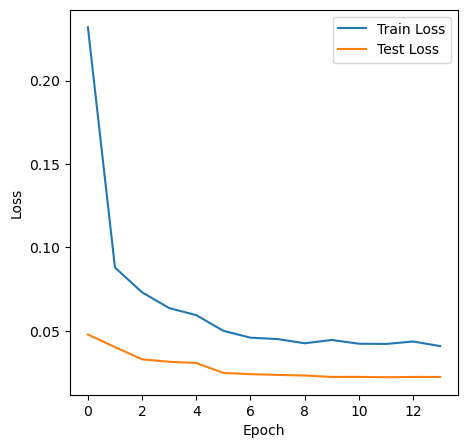

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

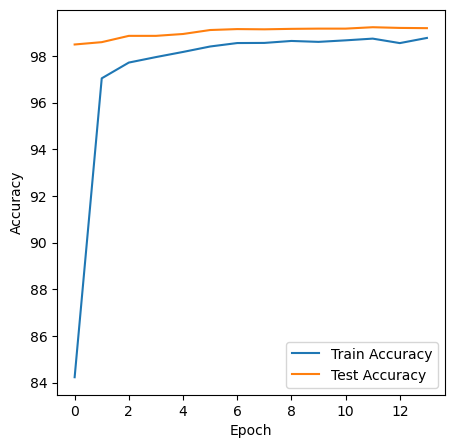

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
